<a href="https://colab.research.google.com/github/hyeonggyeong/Project/blob/main/Analysis_of_Amazon's_Product_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Analysis of Amazon's product sales 
2021-2. Big Data Analytics _ Final Report_2016011405 김형경

In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Preprocessing

In [ ]:
data =pd.read_csv('/content/drive/MyDrive/data/merge_sales_data.csv')

In [ ]:
data.shape

(185950, 6)

In [ ]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101"
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001"
2,236672,iPhone,1,700.00,2008-06-19 14:40,"149 7th St, Portland, OR 97035"
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001"
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001"


In [ ]:
data.isnull().sum() # 데이터 결측치 확인

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [ ]:
data.info()  # order date가 object형식인 것을 확인 가능

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  int64  
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  int64  
 3   Price Each        185950 non-null  float64
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 8.5+ MB


In [ ]:
data['Order Date_format']=pd.to_datetime(data['Order Date']) # datetime형식으로 변환 후 'Order Date_format' 컬럼으로 저장

In [ ]:
data.head()  # Order Date_format 컬럼이 추가 된 것을 확인 가능

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Date_format
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101",2019-08-31 22:21:00
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001",2019-08-15 15:11:00
2,236672,iPhone,1,700.00,2008-06-19 14:40,"149 7th St, Portland, OR 97035",2008-06-19 14:40:00
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001",2019-08-29 20:59:00
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001",2019-08-15 19:53:00


In [ ]:
#분석을 위해 년/월/일/시/분 으로 나누어 컬럼생성
data['Order_year'] = data['Order Date_format'].dt.year
data['Order_month'] = data['Order Date_format'].dt.month
data['Order_day'] = data['Order Date_format'].dt.day
data['Order_hour'] = data['Order Date_format'].dt.hour
data['Order_minute'] = data['Order Date_format'].dt.minute    

In [ ]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Date_format,Order_year,Order_month,Order_day,Order_hour,Order_minute
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101",2019-08-31 22:21:00,2019,8,31,22,21
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001",2019-08-15 15:11:00,2019,8,15,15,11
2,236672,iPhone,1,700.00,2008-06-19 14:40,"149 7th St, Portland, OR 97035",2008-06-19 14:40:00,2008,6,19,14,40
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001",2019-08-29 20:59:00,2019,8,29,20,59
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001",2019-08-15 19:53:00,2019,8,15,19,53


# Q1. When is the month with the highest sales?
→ A1 :  December

In [ ]:
fre_month = data.groupby('Order_month')['Quantity Ordered'].sum()
fre_month.sort_values(ascending = False)

Order_month
12    24441
10    20956
4     19150
11    18606
5     18338
3     16930
7     16613
6     15911
8     15101
2     14729
9     14709
1     13595
Name: Quantity Ordered, dtype: int64

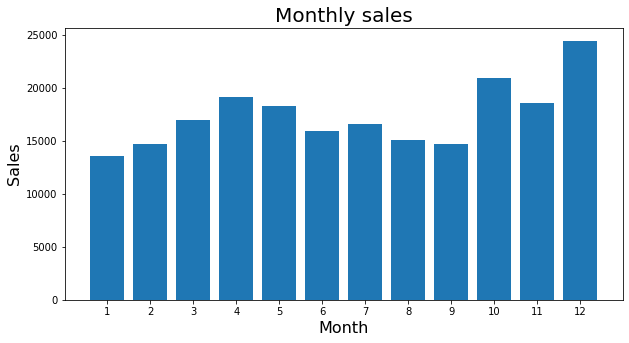

In [ ]:
labels = fre_month.index
plt.subplots(figsize=(10, 5))
plt.bar(labels, fre_month)
plt.xticks(labels)
plt.title('Monthly sales', fontsize = 20)
plt.xlabel('Month', fontsize = 16)
plt.ylabel('Sales', fontsize = 16)
plt.show()

#Q2. When is the time zone with the highest sales?

→ A2 : 19:00~19:59

In [ ]:
fre_time = data.groupby('Order_hour')['Quantity Ordered'].sum()
fre_time.sort_values(ascending = False)

Order_hour
19    14470
12    14202
11    14005
18    13802
20    13768
13    13685
14    12362
10    12308
21    12244
17    12229
16    11662
15    11391
22     9899
9      9816
23     7065
8      7002
7      4556
0      4428
6      2810
1      2619
5      1493
2      1398
4       937
3       928
Name: Quantity Ordered, dtype: int64

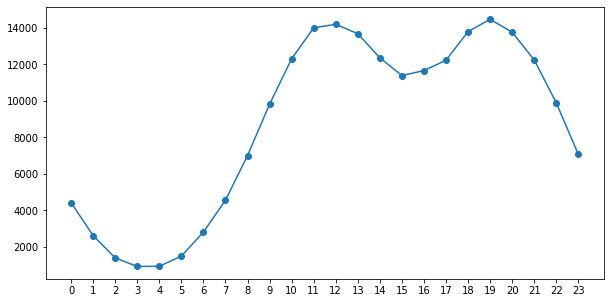

In [ ]:
labels = fre_time.index
plt.subplots(figsize=(10, 5))
plt.plot(labels, fre_time,marker = 'o')
plt.xticks(labels)
plt.show()

# Q3. What's the product that sells the most together?
→ A3 : "iPhone", "Lightning Charging Cable"

In [ ]:
# duplicated 함수를 통해 같은 ID로 구매한 데이터만 추출하여 data1으로 저장
data1 = data[data['Order ID'].duplicated(keep =False)] 

In [ ]:
 #data1에서 Order ID, Product 컬럼만 추출해서 data2에 저장
data2=data1.iloc[:,:2] 

In [ ]:
data2.head()

,Order ID,Product
46,236716,AA Batteries (4-pack)
47,236716,USB-C Charging Cable
60,236729,iPhone
61,236729,Apple Airpods Headphones
62,236730,Google Phone


In [ ]:
# Product컬럼의 범주형 데이터를 pd.get_dummies을 활용하여 0,1의 형태로 변환  → 연관성 분석을 하기 위함
data2 = pd.get_dummies(data2) 

In [ ]:
# 결과 확인
data2.head()

,Order ID,Product_20in Monitor,Product_27in 4K Gaming Monitor,Product_27in FHD Monitor,Product_34in Ultrawide Monitor,Product_AA Batteries (4-pack),Product_AAA Batteries (4-pack),Product_Apple Airpods Headphones,Product_Bose SoundSport Headphones,Product_Flatscreen TV,Product_Google Phone,Product_LG Dryer,Product_LG Washing Machine,Product_Lightning Charging Cable,Product_Macbook Pro Laptop,Product_ThinkPad Laptop,Product_USB-C Charging Cable,Product_Vareebadd Phone,Product_Wired Headphones,Product_iPhone
46,236716,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
47,236716,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
60,236729,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
61,236729,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
62,236730,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [ ]:
# ID를 기준으로 동일한 ID를 가진 행은 더해서 encoder_data에 저장
encoder_data = data2.groupby('Order ID').sum() 

In [ ]:
# 결과 확인
encoder_data.head()

,Product_20in Monitor,Product_27in 4K Gaming Monitor,Product_27in FHD Monitor,Product_34in Ultrawide Monitor,Product_AA Batteries (4-pack),Product_AAA Batteries (4-pack),Product_Apple Airpods Headphones,Product_Bose SoundSport Headphones,Product_Flatscreen TV,Product_Google Phone,Product_LG Dryer,Product_LG Washing Machine,Product_Lightning Charging Cable,Product_Macbook Pro Laptop,Product_ThinkPad Laptop,Product_USB-C Charging Cable,Product_Vareebadd Phone,Product_Wired Headphones,Product_iPhone
Order ID,,,,,,,,,,,,,,,,,,,
141275,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
141290,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
141365,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
141384,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
141450,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0


In [ ]:
#제품명을 쉽게 알아보기 위해 컬럼에 공통적으로 들어가는  "Product_"을 공백으로 바꿔주었음.
encoder_data.columns = encoder_data.columns.str.replace('Product_','')

In [ ]:
# 결과 확인
encoder_data.head()

,20in Monitor,27in 4K Gaming Monitor,27in FHD Monitor,34in Ultrawide Monitor,AA Batteries (4-pack),AAA Batteries (4-pack),Apple Airpods Headphones,Bose SoundSport Headphones,Flatscreen TV,Google Phone,LG Dryer,LG Washing Machine,Lightning Charging Cable,Macbook Pro Laptop,ThinkPad Laptop,USB-C Charging Cable,Vareebadd Phone,Wired Headphones,iPhone
Order ID,,,,,,,,,,,,,,,,,,,
141275,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
141290,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
141365,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
141384,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
141450,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0


In [ ]:
# Apriori 분석을 하기 전, 데이터가 0,1만 있는지 확인하기 위해 max함수를 이용해 각 컬럼별 최대값 검색
# 3개의 컬럼을 제외하고는 2가 있는 것을 확인
encoder_data.max()

20in Monitor                  2
27in 4K Gaming Monitor        2
27in FHD Monitor              2
34in Ultrawide Monitor        2
AA Batteries (4-pack)         2
AAA Batteries (4-pack)        2
Apple Airpods Headphones      2
Bose SoundSport Headphones    2
Flatscreen TV                 2
Google Phone                  2
LG Dryer                      1
LG Washing Machine            1
Lightning Charging Cable      2
Macbook Pro Laptop            2
ThinkPad Laptop               2
USB-C Charging Cable          2
Vareebadd Phone               1
Wired Headphones              2
iPhone                        2
dtype: uint8

In [ ]:
# 최소값도 0이 맞는지 확인
# 모든 컬럼이 최소값 0 
encoder_data.min()

20in Monitor                  0
27in 4K Gaming Monitor        0
27in FHD Monitor              0
34in Ultrawide Monitor        0
AA Batteries (4-pack)         0
AAA Batteries (4-pack)        0
Apple Airpods Headphones      0
Bose SoundSport Headphones    0
Flatscreen TV                 0
Google Phone                  0
LG Dryer                      0
LG Washing Machine            0
Lightning Charging Cable      0
Macbook Pro Laptop            0
ThinkPad Laptop               0
USB-C Charging Cable          0
Vareebadd Phone               0
Wired Headphones              0
iPhone                        0
dtype: uint8

In [ ]:
#encoder_data 중 2라는 데이터의 갯수 파악
encoder_data[encoder_data == 2].sum()

20in Monitor                    6.0
27in 4K Gaming Monitor         10.0
27in FHD Monitor               18.0
34in Ultrawide Monitor         14.0
AA Batteries (4-pack)          70.0
AAA Batteries (4-pack)         96.0
Apple Airpods Headphones       48.0
Bose SoundSport Headphones     54.0
Flatscreen TV                  12.0
Google Phone                    6.0
LG Dryer                        0.0
LG Washing Machine              0.0
Lightning Charging Cable      108.0
Macbook Pro Laptop              6.0
ThinkPad Laptop                 4.0
USB-C Charging Cable           96.0
Vareebadd Phone                 0.0
Wired Headphones               70.0
iPhone                          4.0
dtype: float64

In [ ]:
# 2는 제거하지않고, 1로 replace 해주었음.
encoder_data =encoder_data.replace(2,1)

In [ ]:
# 데이터 내 2가 대체되어 사라진 것을 확인 할 수 있음.
encoder_data[encoder_data == 2].sum()

20in Monitor                  0.0
27in 4K Gaming Monitor        0.0
27in FHD Monitor              0.0
34in Ultrawide Monitor        0.0
AA Batteries (4-pack)         0.0
AAA Batteries (4-pack)        0.0
Apple Airpods Headphones      0.0
Bose SoundSport Headphones    0.0
Flatscreen TV                 0.0
Google Phone                  0.0
LG Dryer                      0.0
LG Washing Machine            0.0
Lightning Charging Cable      0.0
Macbook Pro Laptop            0.0
ThinkPad Laptop               0.0
USB-C Charging Cable          0.0
Vareebadd Phone               0.0
Wired Headphones              0.0
iPhone                        0.0
dtype: float64

In [ ]:
#Apriori분석을 위해 import
from mlxtend.frequent_patterns import apriori

In [ ]:
#정제된 encoder_data를 사용해 apriori로 최소지지도0.005 이상인 itemsets를 찾아 지지도 기준으로 내림차순 하였음.
frequent_product = apriori(encoder_data, min_support=0.005,  use_colnames=True, )
frequent_product.sort_values('support',ascending=False,inplace=True)

In [ ]:
# 지지도 상위 10개의 조합을 검색 
# len = 1인 itemsets를 제외하고 가장 높은 지지도를 보여주는 
# (iPhone, Lightning Charging Cable) 조합이 전체 sales 데이터 중 가장 많이 팔린 조합인 것으로 결과가 나옴.
frequent_product.head(10)

,support,itemsets
13,0.289098,(USB-C Charging Cable)
16,0.261351,(iPhone)
10,0.248459,(Lightning Charging Cable)
15,0.229680,(Wired Headphones)
9,0.229260,(Google Phone)
45,0.141676,"(iPhone, Lightning Charging Cable)"
41,0.139714,"(USB-C Charging Cable, Google Phone)"
6,0.133128,(Apple Airpods Headphones)
7,0.111127,(Bose SoundSport Headphones)
5,0.107483,(AAA Batteries (4-pack))
